In [1]:
import networkx as nx
import numpy as np
import random as rd
from scipy.sparse import csc_matrix
from IPython.display import Image
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

# Paths
A path in a network is a sequence of edges connecting two nodes.

In [2]:
# generate a matrix randomly filled with 0 and 1
N = 8
A = np.random.randint(2,size=(N,N))
A

array([[0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [3]:
# make the matrix A symmetric by using np.tril(A, k=0) to get an undirected network
# k : [int, optional, 0 by default]
#           Diagonal we require; k>0 means diagonal above main diagonal or vice versa.
np.tril(A)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [4]:
np.tril(A,1)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [5]:
np.tril(A,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [6]:
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops
A_symmetric

array([[0, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [7]:
# alternatively, a symmetric matrix having no diagonal elements can be obtained:
A_sym = np.tril(A,-1) + np.tril(A, -1).T
A_sym

array([[0, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0]], dtype=int32)

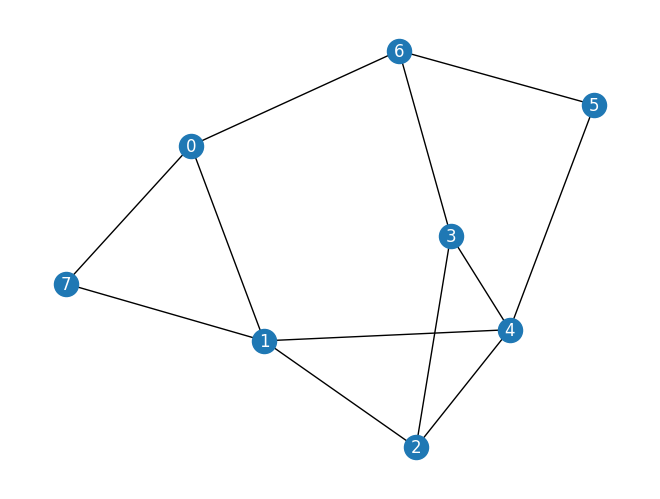

In [8]:
# time to draw a corresponding network
G = nx.from_numpy_array(A_symmetric)
nx.draw(G,with_labels=True,font_color='w')

In [9]:
# nx.all_simple_paths(G, start_node, end_node)
# A simple path is one without any cycles
list(nx.all_simple_paths(G, 1, 6))

[[1, 0, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 6],
 [1, 2, 4, 3, 6],
 [1, 2, 4, 5, 6],
 [1, 4, 2, 3, 6],
 [1, 4, 3, 6],
 [1, 4, 5, 6],
 [1, 7, 0, 6]]

In [10]:
# among them, the shortest is:
nx.shortest_path(G, 1, 6)

[1, 0, 6]

note that this function returns only one of them, missing the others [1,3,6] and [1,7,6]

In [11]:
# to get all the shortest paths,
shortest_paths = []
target = len(nx.shortest_path(G, 1, 6))
for i in list(nx.all_simple_paths(G, 1, 6)):
    if len(i)==target:
        shortest_paths.append(i)
shortest_paths

[[1, 0, 6]]

In [12]:
# of course there is a function to return all shortest paths:
list(nx.all_shortest_paths(G,1,6))

[[1, 0, 6]]

Note that a path length is defined here by the number of edges in the path, not the number of nodes, which implies
nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
for nodes  u  and  v .

# components

True
1
# components: 2


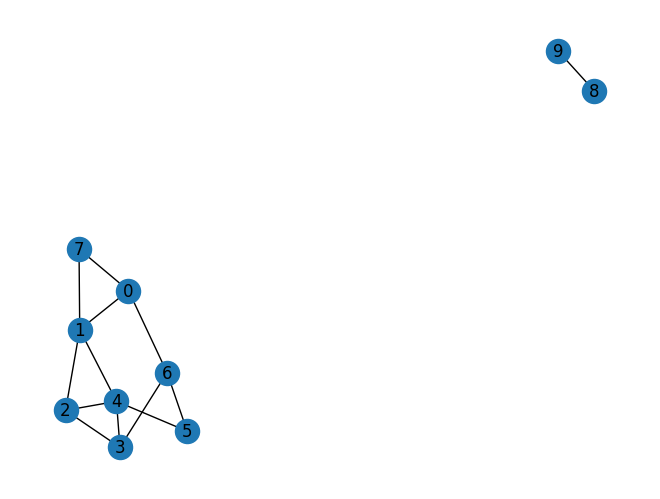

In [13]:
# we can check whether a graph is connected or not by doing:
print(nx.is_connected(G))

# measuring the number of connected components
print(nx.number_connected_components(G))

G.add_edge(8,9)
nx.draw(G, with_labels=True)
print('# components:', nx.number_connected_components(G))

In [14]:
# for obtaining the lists of comnnmected nodes in the components:
list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7}, {8, 9}]

# largest connected component
We often care about the largest connected component (lcc), which is sometimes referred to as the giant component. We can make use of Python's builtin max function in order to obtain the largest connected component. By default, Python's max function sorts things in lexicographic (i.e. alphabetical) order, which is not helpful here. We want the maximum connected component when sorted in order of their sizes, so we pass len as a key function:

In [15]:
max(nx.connected_components(G), key=len)

{0, 1, 2, 3, 4, 5, 6, 7}

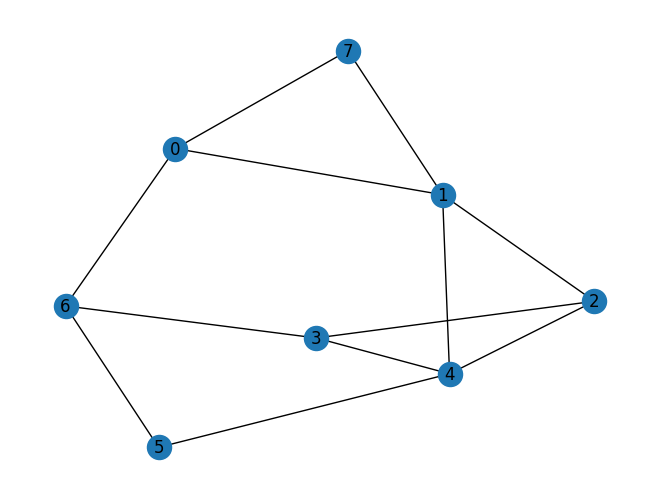

In [16]:
# generate the actual subgraph consisting of the largest connected component with the G.subgraph() function:
# this can be seen as extracting the largest one from the whole network
lcc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(lcc_nodes)
nx.draw(G_lcc, with_labels=True)

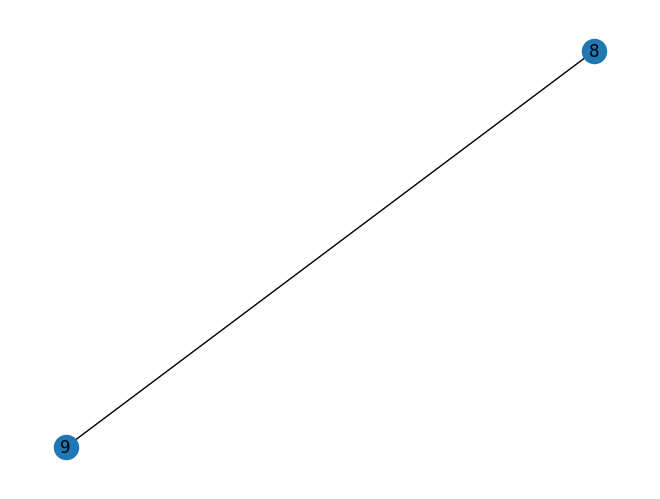

In [17]:
# sure you can do the same to the smallest one:
lcc_nodes = min(nx.connected_components(G), key=len)
G_scc = G.subgraph(lcc_nodes)
nx.draw(G_scc, with_labels=True)